# Emulating using CNNs


In [1]:
import iris

from utils import get_bc_ppe_data

from esem import cnn_model
from esem.utils import get_random_params

import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the parameters and data

In [2]:
ppe_params, ppe_aaod = get_bc_ppe_data()

In [3]:
## Ensure the time dimension is last - this is treated as the color 'channel'
ppe_aaod.transpose((0,2,3,1))

In [4]:
n_test = 5

X_test, X_train = ppe_params[:n_test], ppe_params[n_test:]
Y_test, Y_train = ppe_aaod[:n_test], ppe_aaod[n_test:]

In [5]:
Y_train

<iris 'Cube' of Absorption optical thickness - total 550nm / (1) (job: 34; latitude: 96; longitude: 192; time: 12)>

## Setup and run the models

In [6]:
model = cnn_model(X_train, Y_train)

In [7]:
model.train()

Epoch 1/100
4/4 [==============================] - 3s 71ms/step - loss: 1.1407 - val_loss: 0.4622
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 1.1396 - val_loss: 0.4620
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1391 - val_loss: 0.4618
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 1.1382 - val_loss: 0.4613
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 1.048 - 0s 18ms/step - loss: 1.1360 - val_loss: 0.4577
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1256 - val_loss: 0.4536
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 1.1114 - val_loss: 0.4446
Epoch 8/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0957 - val_loss: 0.4372
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0746 - val_loss: 0.4246
Epoch 10/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0569 - val_loss: 0.

In [8]:
m, v = model.predict(X_test.to_numpy())

C:\Users\duncan\miniconda3\envs\climatebench\lib\site-packages\iris\coords.py:1803: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
C:\Users\duncan\miniconda3\envs\climatebench\lib\site-packages\iris\coords.py:1803: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
C:\Users\duncan\miniconda3\envs\climatebench\lib\site-packages\iris\coords.py:1803: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
C:\Users\duncan\miniconda3\envs\climatebench\lib\site-packages\iris\coords.py:1803: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
C:\Users\duncan\miniconda3\envs\climatebench\lib\site-packages\iris\coords.py:1979: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'sample'.
  warnings.warn(msg.format(self.name()))
C:\Users\duncan\miniconda3\envs\climatebench\lib

Text(0.5, 1.0, 'Difference')

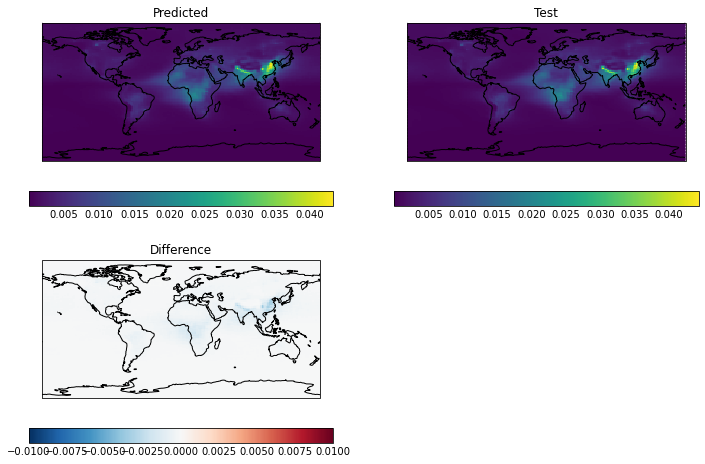

In [9]:
## TODO: Tidy this up a bit
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
qplt.pcolormesh(m[0].collapsed('time', iris.analysis.MEAN))
plt.gca().set_title('Predicted')
plt.gca().coastlines()

plt.subplot(2,2,2)
qplt.pcolormesh(Y_test[0].collapsed('time', iris.analysis.MEAN))
plt.gca().set_title('Test')
plt.gca().coastlines()

plt.subplot(2,2,3)
qplt.pcolormesh((m.collapsed(['sample', 'time'], iris.analysis.MEAN)-Y_test.collapsed(['job', 'time'], iris.analysis.MEAN)), cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.gca().coastlines()
plt.gca().set_title('Difference')

In [10]:
m, sd = model.batch_stats(get_random_params(3, int(1e5)), batch_size=1000)

  0%|          | 0/100000 [00:00<?, ?sample/s]